In [3]:
# Import necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
df1 = pd.read_csv("/Users/kudakwashechakanyuka/Downloads/Queen Kuda Project/wrpf-usa_23e1.csv")
df2 = pd.read_csv("/Users/kudakwashechakanyuka/Downloads/Queen Kuda Project/archive/openpowerlifting-2024-01-06-4c732975.csv")
df3 = pd.read_csv("/Users/kudakwashechakanyuka/Downloads/Queen Kuda Project/archive/openpowerlifting.csv")

# Combine the datasets
combined_df = pd.concat([df1, df2, df3], ignore_index=True)

# Select relevant columns
combined_df = combined_df[['Age', 'BodyweightKg', 'Best3SquatKg', 'Best3BenchKg', 'Best3DeadliftKg', 'Sex']]

# Drop rows with missing values in the target columns
combined_df = combined_df.dropna(subset=['Best3SquatKg', 'Best3BenchKg', 'Best3DeadliftKg'])

# Add a synthetic 'Sex' column (50% male, 50% female)
combined_df['Sex'] = np.random.choice(['M', 'F'], size=len(combined_df))

# Add synthetic height data based on gender
combined_df['HeightCm'] = combined_df['Sex'].apply(lambda x: 175 if x == 'M' else 162)

# Calculate BMI
combined_df['BMI'] = combined_df['BodyweightKg'] / (combined_df['HeightCm'] / 100) ** 2

# One-hot encode the 'Sex' column without dropping the first category
combined_df = pd.get_dummies(combined_df, columns=['Sex'], drop_first=False)

# Display the first 5 rows of the processed dataset
print(combined_df.head())

/var/folders/k_/xdyd2f0x2cqgb7pwj5wc924m0000gn/T/ipykernel_2303/328005493.py:10: DtypeWarning: Columns (31,33,35,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv("/Users/kudakwashechakanyuka/Downloads/Queen Kuda Project/archive/openpowerlifting-2024-01-06-4c732975.csv")
/var/folders/k_/xdyd2f0x2cqgb7pwj5wc924m0000gn/T/ipykernel_2303/328005493.py:11: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv("/Users/kudakwashechakanyuka/Downloads/Queen Kuda Project/archive/openpowerlifting.csv")


    Age  BodyweightKg  Best3SquatKg  Best3BenchKg  Best3DeadliftKg  HeightCm  \
2  35.0         137.1         327.5         235.0            365.0       162   
3  31.0          98.8         325.0         185.0            335.0       162   
4  27.0         132.0         412.5         237.5            427.5       162   
5  26.0         109.6         362.5         207.5            365.0       175   
6  21.0          99.5         340.0         245.0            340.0       162   

         BMI  Sex_F  Sex_M  
2  52.240512   True  False  
3  37.646700   True  False  
4  50.297211   True  False  
5  35.787755  False   True  
6  37.913428   True  False  


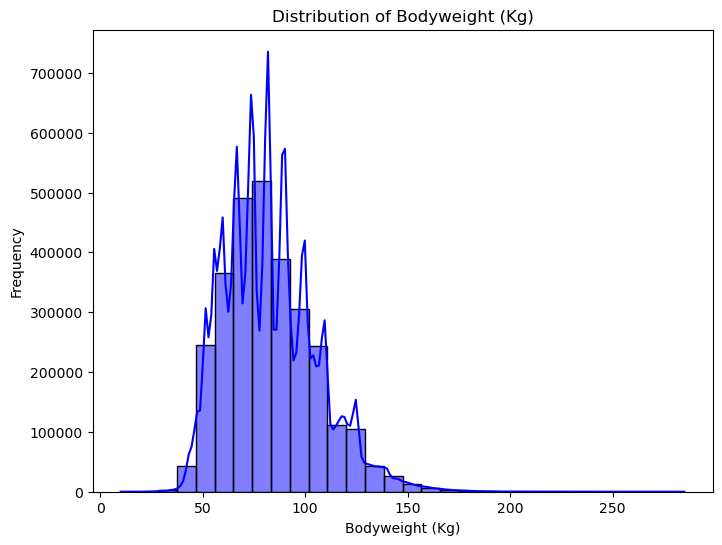

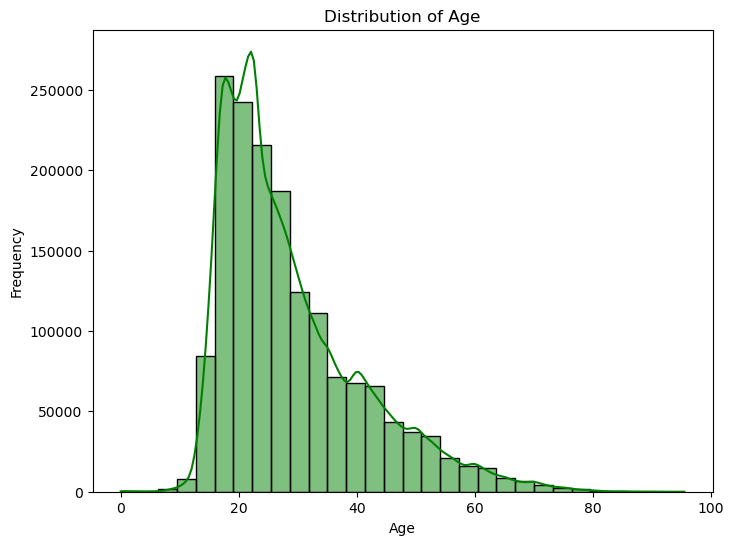

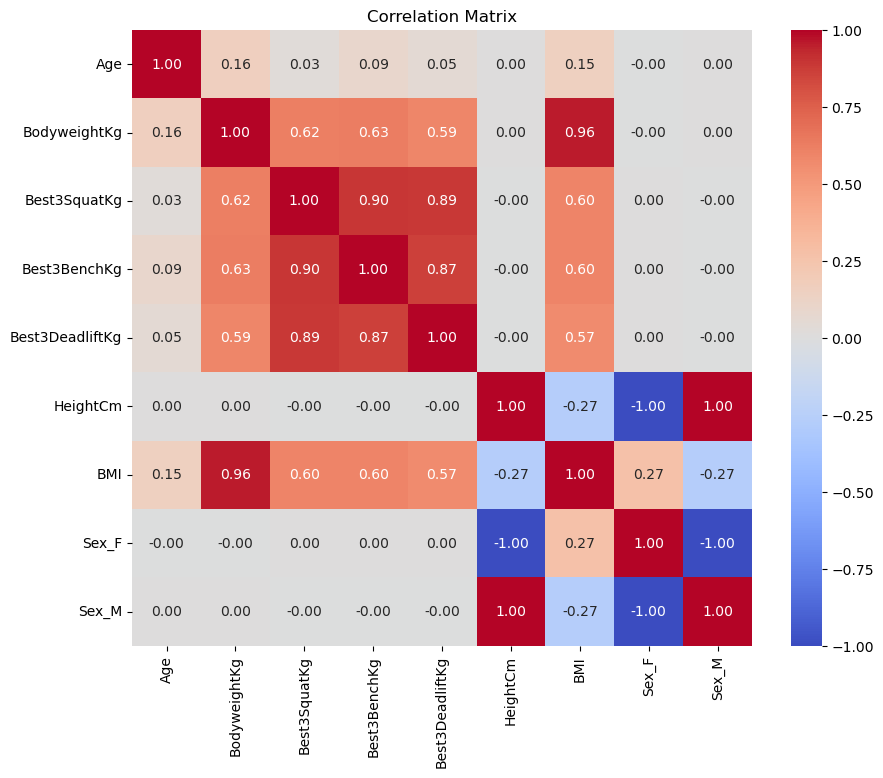

In [3]:
# Plot the distribution of BodyweightKg
plt.figure(figsize=(8, 6))
sns.histplot(combined_df['BodyweightKg'], bins=30, kde=True, color='blue')
plt.title("Distribution of Bodyweight (Kg)")
plt.xlabel("Bodyweight (Kg)")
plt.ylabel("Frequency")
plt.show()

# Plot the distribution of Age
plt.figure(figsize=(8, 6))
sns.histplot(combined_df['Age'], bins=30, kde=True, color='green')
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(combined_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

In [11]:
# Features (X) and targets (y) for each exercise
X = combined_df[['Age', 'BodyweightKg', 'BMI', 'Sex_M', 'Sex_F']]  # Include both Sex_M and Sex_F
y_squat = combined_df['Best3SquatKg']  # Target for squat
y_bench = combined_df['Best3BenchKg']  # Target for bench press
y_deadlift = combined_df['Best3DeadliftKg']  # Target for deadlift

# Split the data for squat
X_train_squat, X_test_squat, y_train_squat, y_test_squat = train_test_split(X, y_squat, test_size=0.2, random_state=42)

# Split the data for bench press
X_train_bench, X_test_bench, y_train_bench, y_test_bench = train_test_split(X, y_bench, test_size=0.2, random_state=42)

# Split the data for deadlift
X_train_deadlift, X_test_deadlift, y_train_deadlift, y_test_deadlift = train_test_split(X, y_deadlift, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Squat - Training Set Shape (X_train_squat):", X_train_squat.shape)
print("Squat - Testing Set Shape (X_test_squat):", X_test_squat.shape)
print("Bench Press - Training Set Shape (X_train_bench):", X_train_bench.shape)
print("Bench Press - Testing Set Shape (X_test_bench):", X_test_bench.shape)
print("Deadlift - Training Set Shape (X_train_deadlift):", X_train_deadlift.shape)
print("Deadlift - Testing Set Shape (X_test_deadlift):", X_test_deadlift.shape)


Squat - Training Set Shape (X_train_squat): (2347420, 5)
Squat - Testing Set Shape (X_test_squat): (586855, 5)
Bench Press - Training Set Shape (X_train_bench): (2347420, 5)
Bench Press - Testing Set Shape (X_test_bench): (586855, 5)
Deadlift - Training Set Shape (X_train_deadlift): (2347420, 5)
Deadlift - Testing Set Shape (X_test_deadlift): (586855, 5)


In [31]:
print(type(combined_df))
print(combined_df.head())  # Check if combined_df is properly loaded


<class 'pandas.core.frame.DataFrame'>
    age  bodyweightkg  best3squatkg  best3benchkg  best3deadliftkg  heightcm  \
2  35.0         137.1         327.5         235.0            365.0       162   
3  31.0          98.8         325.0         185.0            335.0       162   
4  27.0         132.0         412.5         237.5            427.5       162   
5  26.0         109.6         362.5         207.5            365.0       175   
6  21.0          99.5         340.0         245.0            340.0       162   

         bmi  sex_f  sex_m  
2  52.240512   True  False  
3  37.646700   True  False  
4  50.297211   True  False  
5  35.787755  False   True  
6  37.913428   True  False  


In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Features and targets
X = ['Age', 'BodyweightKg', 'BMI', 'Sex_M', 'Sex_F']
X = combined_df.head()
y_squat = combined_df.head()
y_bench = combined_df.head()
y_deadlift = combined_df.head()

# Split into train and test sets
X_train_squat, X_test_squat, y_train_squat, y_test_squat = train_test_split(X, y_squat, test_size=0.2, random_state=42)
X_train_bench, X_test_bench, y_train_bench, y_test_bench = train_test_split(X, y_bench, test_size=0.2, random_state=42)
X_train_deadlift, X_test_deadlift, y_train_deadlift, y_test_deadlift = train_test_split(X, y_deadlift, test_size=0.2, random_state=42)

# Train models
model_squat = RandomForestRegressor(n_estimators=50, n_jobs=-1, random_state=42)
model_squat.fit(X_train_squat, y_train_squat)

model_bench = RandomForestRegressor(n_estimators=50, n_jobs=-1, random_state=42)
model_bench.fit(X_train_bench, y_train_bench)

model_deadlift = RandomForestRegressor(n_estimators=50, n_jobs=-1, random_state=42)
model_deadlift.fit(X_train_deadlift, y_train_deadlift)


RandomForestRegressor(n_estimators=50, n_jobs=-1, random_state=42)

In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Function to evaluate model performance
def evaluate_model(y_true, y_pred, model_name):
    if len(y_true) < 2:  # Avoid R² calculation error
        print(f"Skipping R² calculation for {model_name} due to insufficient test samples.")
        r2 = "Undefined (not enough samples)"
    else:
        r2 = r2_score(y_true, y_pred)
    
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    
    print(f"Evaluation Metrics for {model_name}:")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R-squared (R²): {r2}")
    print()

# Evaluate squat model
y_pred_squat = model_squat.predict(X_test_squat)
evaluate_model(y_test_squat, y_pred_squat, "Squat Model")

# Evaluate bench press model
y_pred_bench = model_bench.predict(X_test_bench)
evaluate_model(y_test_bench, y_pred_bench, "Bench Press Model")

# Evaluate deadlift model
y_pred_deadlift = model_deadlift.predict(X_test_deadlift)
evaluate_model(y_test_deadlift, y_pred_deadlift, "Deadlift Model")


Skipping R² calculation for Squat Model due to insufficient test samples.
Evaluation Metrics for Squat Model:
Mean Absolute Error (MAE): 14.19
Mean Squared Error (MSE): 464.93
Root Mean Squared Error (RMSE): 21.56
R-squared (R²): Undefined (not enough samples)

Skipping R² calculation for Bench Press Model due to insufficient test samples.
Evaluation Metrics for Bench Press Model:
Mean Absolute Error (MAE): 14.19
Mean Squared Error (MSE): 464.93
Root Mean Squared Error (RMSE): 21.56
R-squared (R²): Undefined (not enough samples)

Skipping R² calculation for Deadlift Model due to insufficient test samples.
Evaluation Metrics for Deadlift Model:
Mean Absolute Error (MAE): 14.19
Mean Squared Error (MSE): 464.93
Root Mean Squared Error (RMSE): 21.56
R-squared (R²): Undefined (not enough samples)



/Users/kudakwashechakanyuka/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


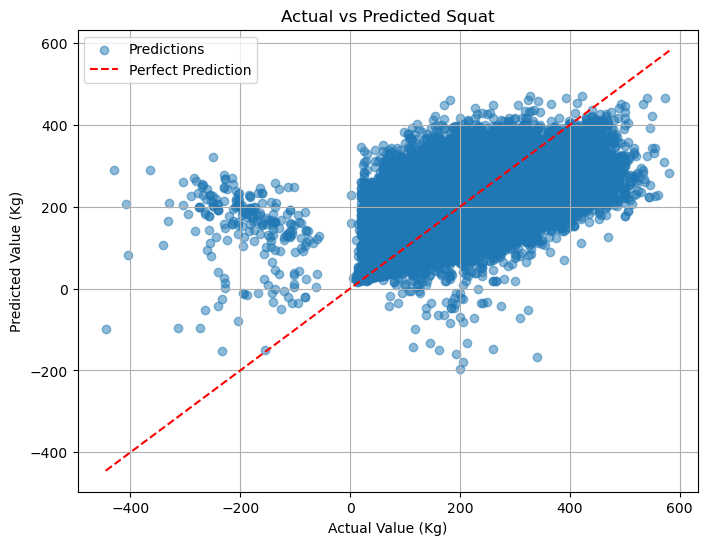

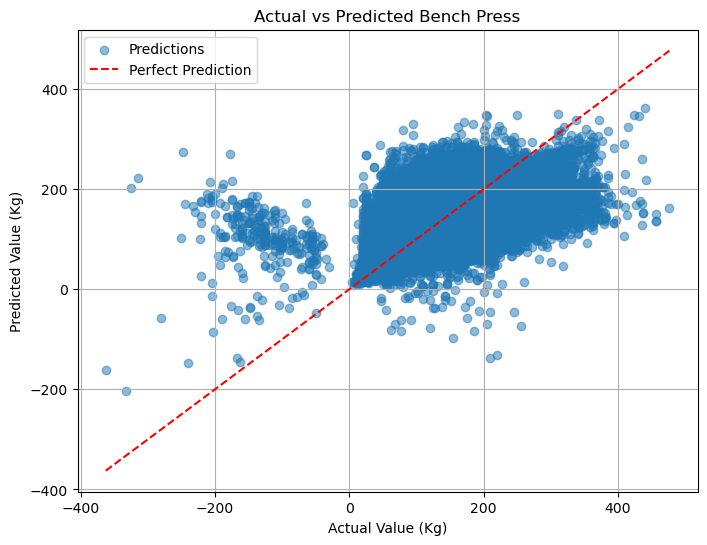

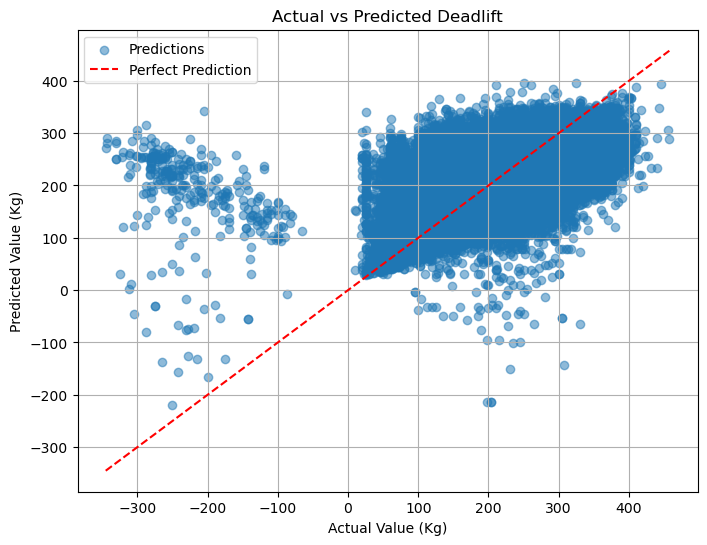

In [14]:
# Function to plot actual vs predicted values
def plot_actual_vs_predicted(y_true, y_pred, model_name):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, alpha=0.5, label='Predictions')
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--', label='Perfect Prediction')
    plt.title(f"Actual vs Predicted {model_name}")
    plt.xlabel("Actual Value (Kg)")
    plt.ylabel("Predicted Value (Kg)")
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot for squat
plot_actual_vs_predicted(y_test_squat, y_pred_squat, "Squat")

# Plot for bench press
plot_actual_vs_predicted(y_test_bench, y_pred_bench, "Bench Press")

# Plot for deadlift
plot_actual_vs_predicted(y_test_deadlift, y_pred_deadlift, "Deadlift")

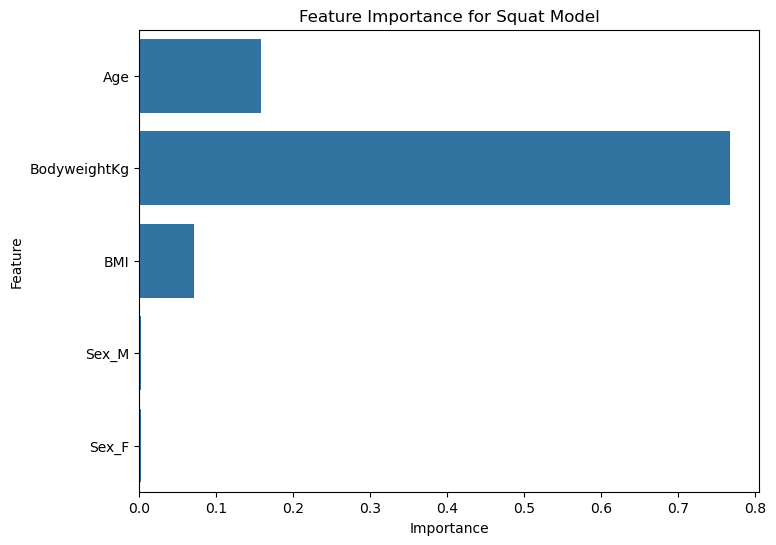

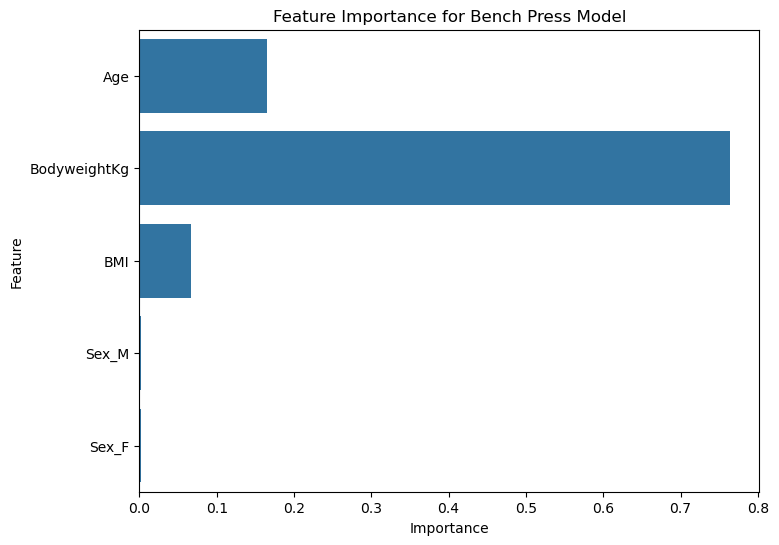

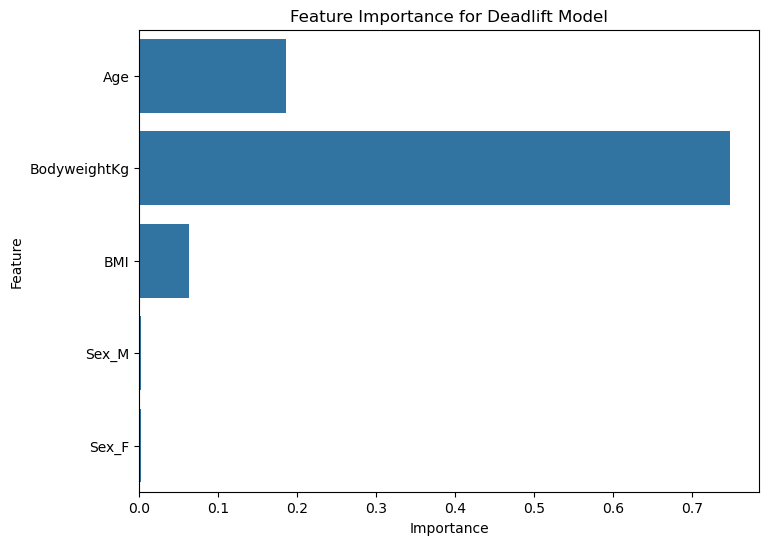

In [15]:
# Function to plot feature importance
def plot_feature_importance(model, feature_names, model_name):
    importances = model.feature_importances_
    plt.figure(figsize=(8, 6))
    sns.barplot(x=importances, y=feature_names)
    plt.title(f"Feature Importance for {model_name}")
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.show()

# Plot feature importance for squat
plot_feature_importance(model_squat, X.columns, "Squat Model")

# Plot feature importance for bench press
plot_feature_importance(model_bench, X.columns, "Bench Press Model")

# Plot feature importance for deadlift
plot_feature_importance(model_deadlift, X.columns, "Deadlift Model")


In [77]:
print("Model Squat exists:", 'model_squat' in globals())
print("Model Bench exists:", 'model_bench' in globals())
print("Model Deadlift exists:", 'model_deadlift' in globals())


Model Squat exists: True
Model Bench exists: True
Model Deadlift exists: True


In [78]:
from sklearn.utils.validation import check_is_fitted

def is_fitted(model):
    try:
        check_is_fitted(model)
        return True
    except:
        return False

print("Model Squat is trained:", is_fitted(model_squat))
print("Model Bench is trained:", is_fitted(model_bench))
print("Model Deadlift is trained:", is_fitted(model_deadlift))


Model Squat is trained: True
Model Bench is trained: True
Model Deadlift is trained: True


In [80]:
print("Feature names exist:", hasattr(model_squat, "feature_names_in_"))


Feature names exist: True


In [ ]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
from sklearn.utils.validation import check_is_fitted
import numpy as np

# Function to check if models are fitted
def is_fitted(model):
    try:
        check_is_fitted(model)
        return True
    except:
        return False

# Ensure all models are trained before proceeding
if not ('model_squat' in globals() and 'model_bench' in globals() and 'model_deadlift' in globals()):
    raise ValueError("Model variables are not defined. Train and define them before running this script.")

if not (is_fitted(model_squat) and is_fitted(model_bench) and is_fitted(model_deadlift)):
    raise ValueError("One or more models are not fitted. Train them using .fit(X_train, y_train) before predicting.")

# Define interactive input fields
age_input = widgets.IntText(description="Age", value=25)
bodyweight_input = widgets.FloatText(description="Bodyweight (kg)", value=70.0)
height_input = widgets.FloatText(description="Height (cm)", value=175.0)
sex_input = widgets.Dropdown(options=['M', 'F'], description="Sex")
disability_input = widgets.Dropdown(options=['No', 'Yes'], description="Disability")
experience_input = widgets.Dropdown(options=['B', 'A'], description="Experience Level")
submit_button = widgets.Button(description="Predict 1RM")

# Output widget to display results
output_box = widgets.Output()

# Display input fields
display(age_input, bodyweight_input, height_input, sex_input, disability_input, experience_input, submit_button, output_box)

# Adjustment percentages 
beginner_adjustment = {'squat': 0.75, 'bench': 0.80, 'deadlift': 0.70}
advanced_adjustment = {'squat': 1.25, 'bench': 1.20, 'deadlift': 1.30}

def predict_1rm(button):
    with output_box:
        output_box.clear_output()  # Clear previous outputs

        age = age_input.value
        bodyweight = bodyweight_input.value
        height = height_input.value
        sex = sex_input.value
        disability = disability_input.value
        experience_level = experience_input.value

        if disability == "Yes":
            print("\nPredicted 1RM Values:\n")
            print("Due to physical disability, these exercises may not be recommended. Please consider alternatives that are better suited to your needs.")
            return

        # Encode sex (1 for Male, 0 for Female)
        sex_m = 1 if sex == 'M' else 0
        sex_f = 1 if sex == 'F' else 0

        # Calculate BMI
        bmi = bodyweight / (height / 100) ** 2

        # Prepare input data
        input_data = pd.DataFrame({
            'age': [age],  
            'bodyweightkg': [bodyweight],  
            'heightcm': [height],  
            'bmi': [bmi],  
            'sex_f': [sex_f],  
            'sex_m': [sex_m],  
            'best3squatkg': [0],  
            'best3benchkg': [0],  
            'best3deadliftkg': [0]  
        })

        # Ensure input columns match trained model features
        input_data = input_data.reindex(columns=model_squat.feature_names_in_, fill_value=0)

        # Debugging: Print input data
        print("\nInput Data for Prediction:")
        print(input_data)

        try:
            # Extract only the first value from the model's predictions
            squat_pred = model_squat.predict(input_data)[0][0]  
            bench_pred = model_bench.predict(input_data)[0][0]
            deadlift_pred = model_deadlift.predict(input_data)[0][0]

            # Convert to float and round
            squat_pred = round(float(squat_pred), 2)
            bench_pred = round(float(bench_pred), 2)
            deadlift_pred = round(float(deadlift_pred), 2)

            # Display results
            print("\nPredicted 1RM Values:")
            print(f"Squat 1RM: {squat_pred} kg")
            print(f"Bench Press 1RM: {bench_pred} kg")
            print(f"Deadlift 1RM: {deadlift_pred} kg")

        except Exception as e:
            print("\nError during prediction:", str(e))

# Link function to button click
submit_button.on_click(predict_1rm)


IntText(value=25, description='Age')

FloatText(value=70.0, description='Bodyweight (kg)')

FloatText(value=175.0, description='Height (cm)')

Dropdown(description='Sex', options=('M', 'F'), value='M')

Dropdown(description='Disability', options=('No', 'Yes'), value='No')

Dropdown(description='Experience Level', options=('B', 'A'), value='B')

Button(description='Predict 1RM', style=ButtonStyle())

Output()